<a href="https://colab.research.google.com/github/CHADHURBALA/Image-Classification/blob/main/CNN_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
%tensorflow_version 2.x
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizing pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

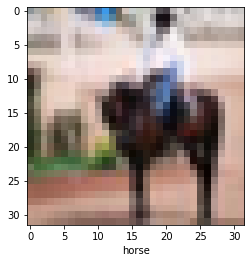

In [17]:
# Plotting an Image
IMG_INDEX = 11 

plt.imshow(train_images[IMG_INDEX] ,cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()

In [18]:
#CNN Architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [19]:
model.summary()  

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [20]:
#Dense layers
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

In [22]:
#training

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5554 - accuracy: 0.4348 - val_loss: 1.2921 - val_accuracy: 0.5340
Epoch 2/10
1563/1563 [==============================] - 71s 46ms/step - loss: 1.1830 - accuracy: 0.5815 - val_loss: 1.1646 - val_accuracy: 0.5890
Epoch 3/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.0414 - accuracy: 0.6321 - val_loss: 1.0436 - val_accuracy: 0.6317
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9452 - accuracy: 0.6687 - val_loss: 0.9559 - val_accuracy: 0.6630
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8786 - accuracy: 0.6922 - val_loss: 0.9297 - val_accuracy: 0.6740
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8162 - accuracy: 0.7117 - val_loss: 0.9138 - val_accuracy: 0.6810
Epoch 7/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.7698 - accuracy: 0.7290 - val_loss: 0.8891 -

In [23]:
#Evaluating the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

313/313 - 3s - loss: 0.8814 - accuracy: 0.7012 - 3s/epoch - 11ms/step
0.701200008392334
